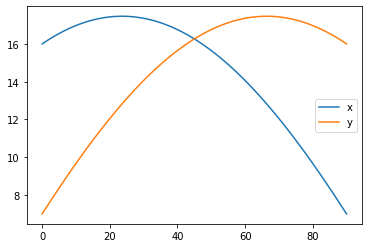

In [16]:
import numpy as np
import matplotlib.pyplot as plt

a = 16
b = 7
theta = np.linspace(0, 90, 100)
x = a * np.cos(theta * np.pi/180) + b * np.sin(theta * np.pi/180)
y = a * np.sin(theta * np.pi/180) + b * np.cos(theta * np.pi/180)

plt.figure()
plt.plot(theta, x, label="x")
plt.plot(theta, y, label="y")

plt.legend(loc=0)

plt.show()